# Kaggle ML Challenge 4

**INTRODUCTION:**

The last Kaggle Challenge is very interesting where we get to pick the dataset we want to work with from the previous Kaggle challenges. As we have already worked with the dataset previously, it fairly saves up the time on getting to know the dataset and understanding the concept. For my Kaggle Challenge 4, I worked on improving the score of my previous Kaggle Challenge 2 which is the Multi-modal CITE seq Prediction by implementing **Autoencoder**.

```Autoencoder``` is one of the type of the artificial neural network which is used for unsupervised learning which consists of two main components that are an encoder and decoder. Encoder is used to forward pass through the encoding layer of the autoencoder and decoder performs the forward pass through the decoding layer of the autoencoder.

**IMPORT DATASET:**

Firstly, I started with importing the dataset and create a NumPy arrays.


In [1]:
import numpy as np

#importing data set and store as numpy.ndarray array
A = np.genfromtxt('ml2/training_set_rna1.csv', delimiter=',', dtype=None, encoding=None)
y = np.genfromtxt('ml2/training_set_adt1.csv', delimiter=',', dtype=None, encoding=None)
A_test = np.genfromtxt('ml2/test_set_rna1.csv', delimiter=',', dtype=None, encoding=None)
A_test = np.vstack((np.zeros((25, 1000)), A_test))
train = np.vstack((A, y))

In [2]:
train.shape

(664, 4000)

In [3]:
A_test.shape

(664, 1000)

Here in the below function, I have implemented the code that defines three function which are ```relu``` , ```relu_prime``` and ```he_int```. In the relu function, it takes a numpy array x as input and then applies the Relu function element-wise. Similarly, the relu_prime calculates the derivative of the ReLu activation function and the he_int function implements the He initialization technique for intializing the weights of neural network layers.

In [12]:
import numpy as np


# ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Derivative of ReLU function
def relu_prime(x):
    return np.where(x > 0, 1, 0)

# HE initialization for weights
def he_init(n_in, n_out):
    return np.random.randn(n_out, n_in) * np.sqrt(2.0 / n_in)

Similarly, I constructed an Autoencoder class which involves forward propagation, backpropagation and weight updates. I have used He intialization technique that initializes the weight and biases for both the encoding and decoding layers. Also, I have defined a method name reconstruct within a class which performs reconstruction of the input matrix X using an encoder and decoder model which is performed on each column.

In [13]:
class Autoencoder:
    def __init__(self, input_size, hidden_size, activation_func=relu):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.activation_func = activation_func

        # Initialize weights and biases for encoding
        self.weights_enc = he_init(input_size, hidden_size)
        self.biases_enc = np.zeros((hidden_size, 1))

        # Initialize weights and biases for decoding
        self.weights_dec = he_init(hidden_size, input_size)
        self.biases_dec = np.zeros((input_size, 1))

    def encode(self, x):
        # Forward pass through encoding layer
        z = np.dot(self.weights_enc, x) + self.biases_enc
        a = self.activation_func(z)
        return a

    def decode(self, x):
        # Forward pass through decoding layer
        z = np.dot(self.weights_dec, x) + self.biases_dec
        a = relu(z)
        return a

    def train(self, X, learning_rate=0.001, num_epochs=20):
        # Loop over epochs
        for epoch in range(num_epochs):
            # Loop over columns in X
            totalError = 0
            for i in range(X.shape[1]):
                # Forward pass through encoding and decoding layers
                x = X[:, i].reshape((-1, 1))
                a_enc = self.encode(x)
                a_dec = self.decode(a_enc)

                # Backpropagation
                error = a_dec - x
                totalError += np.sum(abs(error))
                delta = error * relu_prime(a_dec)
                grad_w_dec = np.dot(delta, a_enc.T)
                grad_b_dec = delta

                delta1= np.dot(self.weights_dec.T, delta) * relu_prime(a_enc)
                grad_w_enc = np.dot(delta, x.T)
                grad_b_enc = delta1

                # Update weights and biases
                self.weights_dec -= learning_rate * np.dot(grad_w_dec,a_enc) 
                self.biases_dec -= learning_rate * grad_b_dec.sum(axis=1, keepdims=True)
                #print("biases_dec",self.biases_dec)
                self.weights_enc += (learning_rate * np.dot(grad_w_enc.T,x)).T
                self.biases_enc += learning_rate * grad_b_enc.sum(axis=1, keepdims=True)
                
            print(totalError)
            print(epoch)
            
    def reconstruct(self, X):
        # Loop over columns in X
        reconstructed_X = np.zeros_like(X)
        for i in range(X.shape[1]):
            # Forward pass through encoding and decoding layers
            x = X[:, i].reshape((-1, 1))
            a_enc = self.encode(x)
            a_dec = self.decode(a_enc)

            # Add reconstructed column to output matrix
            reconstructed_X[:, i] = a_dec.squeeze()

        return reconstructed_X

Here, I have called the autoencoder model using the class Autoencoder with an input size of 664 and the hidden size of 32. I have then implemented the autoencoder in the training set i.e. train.

In [14]:
# Autoencoder with input size 664 and hidden size 32
autoencoder = Autoencoder(664, 32)
autoencoder.train(train)

2808805.612986
0
2698812.8150216653
1
2698278.4353377433
2
2698269.8792733923
3
2698269.7233593697
4
2698269.720509415
5
2698269.720457321
6
2698269.7204563715
7
2698269.720456355
8
2698269.720456354
9
2698269.720456354
10
2698269.720456354
11
2698269.720456354
12
2698269.720456354
13
2698269.720456354
14
2698269.720456354
15
2698269.720456354
16
2698269.720456354
17
2698269.720456354
18
2698269.720456354
19


I then worked on reconstructing the test data i.e. A_test using the autoencoder model which performs a column-wise reconstruction of the input matrix using the autoencoder model. I also calculated the mean squared error between the test data and reconstructed output to see how well the autoencoder model is able to reconstruct the test data. Furthermore, I also created a plot to visualize the relationship between the rest data and the corresponding reconstructed output which helped me better understand how my model was performing. So, I felt the autoencoder model might not be accurately reconstructing.

In [15]:
# Reconstruct test data A_test
reconstructed_X_test = autoencoder.reconstruct(A_test)

In [16]:
# Compute MSE between train and reconstructed_X_test
mse = np.mean((A_test - reconstructed_X_test)**2)
print("MSE: {:.4f}".format(mse))

MSE: 3.7504


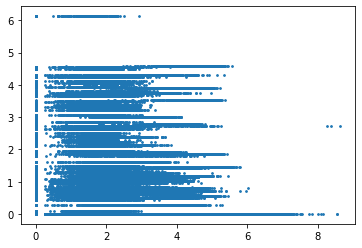

In [17]:
import matplotlib.pyplot as plt
plt.scatter(A_test, reconstructed_X_test,s=3)
plt.show()

**ANOTHER APPROACH:**

I tried implementing **Adam Optimizer** to minimize the reconstructuion error between the test data and the reconstructed output. This function takes various parameters such as x is the input data, k is the number of hidden units, learning_rate is the learning rate for the Adam Optimizer, epochs is the number of training epochs, beta1 and beta2 are the parameters for the Adam optimizer, tolerance nad verbose.

Similarly, applying the ReLU activation function to the dot product of the input data "x" and the weight matrix "w" yields the hidden layer representation "al" and the encoder is then applied to the input.Then the decoder is applied to the hidden layer representation "al" by doing the dot product of "al" and the weight matrix "w" transposed, and then applying the ReLU activation function to get the reconstructed output "a2". I have also implemented gradient to compute for the encoder and decoder using the error and the relu function

In [5]:
import numpy as np

def autoencoder(x, k=512, learning_rate=0.001, epochs=30, betal=0.9, beta2=0.999, verbose=True, early_stop_tol=0.00001):
    # He initialization
    w = np.abs(np.random.normal(scale=np.sqrt(2 / x.shape[0]), size=(x.shape[0], k)))
    err = np.zeros(epochs)
    tol_ = np.inf
    m = v = t = 0
    if verbose:
        print("Running with optimizer: Adam")
    for epoch in range(epochs):
        total_error = 0
        for i in range(x.shape[1]):
            # encoder
            al = np.maximum(x[:, i] @ w, 0) 
            #al = np.maximum(x[:, i] @ w, 0) # relu
            a2 = np.maximum(al @ w.T, 0) # relu
            # calculate error
            error = x[:, i] - a2
            total_error += np.abs(np.round(error)).sum()
            # decoder
            a2_delta = error * (a2 > 0) 
            al_delta = (a2_delta.T @ w).T * (al > 0)

            dW = x[:, i].reshape(-1, 1) @ al_delta.reshape(1, -1) + (al.reshape(1, -1).T @ a2_delta.reshape(1, -1)).T
            #adam 
            t += 1
            m = betal * m + (1 - betal) * dW
            v = beta2 * v + (1 - beta2) * dW ** 2
            m_hat = m / (1 - betal ** t)
            v_hat = v / (1 - beta2 ** t)
            w += learning_rate * m_hat / (np.sqrt(v_hat) + 1e-8)

            # apply non-negativity constraints
            w = np.maximum(w, 0)
            err[epoch] += np.mean(np.abs(error))
        err[epoch] /= x.shape[1]
        print(f"epoch: {epoch+1}, Total Error: {total_error}")
        
        if epoch > 0:
            tol_ = np.abs(err[epoch] - err[epoch-1]) / err[epoch-1]
            if tol_ < early_stop_tol:
                if verbose:
                    print("Early stopping criterion met: error did not improve significantly.")
                break
        if verbose:
            print(f"epoch: {epoch+1}, error: {err[epoch]}, tol: {tol_}")
    return {"w": w, "h": w.T @ x, "error": err}


In [6]:
# Train the autoencoder model
autoencoder_model = autoencoder(train)

# Reconstruct the test_set by looping through each column
re_test_set = np.zeros((A_test.shape[0], A_test.shape[1]))

for i in range(A_test.shape[1]):
    # Encode the test data using the trained model
    encoded = np.maximum(np.dot(A_test[:, i], autoencoder_model['w']), 0)
    
    # Decode the encoded data using the trained model
    decoded = np.maximum(np.dot(encoded, autoencoder_model['w'].T), 0)
    
    # Store the reconstructed data in the re_test_set matrix
    re_test_set[:, i] = decoded


Running with optimizer: Adam
epoch: 1, Total Error: 33331272.0
epoch: 1, error: 12.555050785796828, tol: inf
epoch: 2, Total Error: 2320560.0
epoch: 2, error: 0.874228124676268, tol: 0.930368411917118
epoch: 3, Total Error: 1869663.0
epoch: 3, error: 0.7039900915525446, tol: 0.19472953147871286
epoch: 4, Total Error: 1639051.0
epoch: 4, error: 0.6546613385891864, tol: 0.07007023757191097
epoch: 5, Total Error: 1020124.0
epoch: 5, error: 0.46027998799828584, tol: 0.29691893981367196
epoch: 6, Total Error: 473684.0
epoch: 6, error: 0.2656196805891621, tol: 0.42291716451910727
epoch: 7, Total Error: 397491.0
epoch: 7, error: 0.23147815874610336, tol: 0.1285353621664274
epoch: 8, Total Error: 303031.0
epoch: 8, error: 0.19062876434000423, tol: 0.1764719169505092
epoch: 9, Total Error: 244558.0
epoch: 9, error: 0.16411815964242144, tol: 0.1390692783923136
epoch: 10, Total Error: 215584.0
epoch: 10, error: 0.15048240653230915, tol: 0.08308497450752364
epoch: 11, Total Error: 202308.0
epoch: 

In [7]:
# Compute MSE between train and reconstructed_X_test
mse = np.mean((A_test - re_test_set)**2)
print("MSE: {:.4f}".format(mse))

MSE: 0.5731


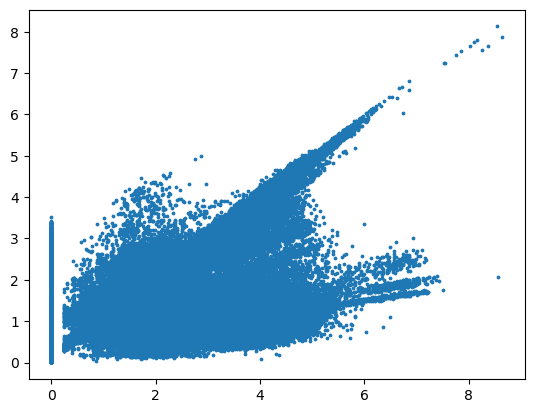

In [8]:
import matplotlib.pyplot as plt
plt.scatter(A_test, re_test_set,s=3)
plt.show()

As the value of MSE was less than that of the previous autoencoder model I built, I felt this model accuratly reconstructed the input data. Similarly, through the plot we can see that the plot shows some linear pattern which is a far better than the previous model. 

I also tried tweaking around to make some changes with the number of hidden layers, learning rate, and epochs to see how it performed and among all the hidden layer with 512 neurons, learning rate of 0.0001 and epoch with 15 performed better than the other.

In [32]:
def autoencoder(x, k=128, learning_rate=0.001, epochs=15, betal=0.9, beta2=0.999, verbose=True, early_stop_tol=0.00001):
    # He initialization
    #w = np.abs(np.random.normal(scale=np.sqrt(2/x.shape[0]), size=(x.shape[1], k)))
    #err = np.zeros(epochs)
    #m = v = t = 0
    w = np.abs(np.random.normal(scale=np.sqrt(2 / x.shape[0]), size=(x.shape[0], k)))
    err = np.zeros(epochs)
    tol_ = np.inf
    m = v = t = 0
    if verbose:
        print("Running with optimizer: Adam")
    for epoch in range(epochs):
        total_error = 0
        for i in range(x.shape[1]):
            # encoder
            al = np.maximum(x[:, i] @ w, 0) 
            #al = np.maximum(x[:, i] @ w, 0) # relu
            a2 = np.maximum(al @ w.T, 0) # relu
            # calculate error
            error = x[:, i] - a2
            total_error += np.abs(np.round(error)).sum()
            # decoder
            a2_delta = error * (a2 > 0) 
            al_delta = (a2_delta.T @ w).T * (al > 0)

            dW = x[:, i].reshape(-1, 1) @ al_delta.reshape(1, -1) + (al.reshape(1, -1).T @ a2_delta.reshape(1, -1)).T
            #adam 
            t += 1
            m = betal * m + (1 - betal) * dW
            v = beta2 * v + (1 - beta2) * dW ** 2
            m_hat = m / (1 - betal ** t)
            v_hat = v / (1 - beta2 ** t)
            w += learning_rate * m_hat / (np.sqrt(v_hat) + 1e-8)

            # apply non-negativity constraints
            w = np.maximum(w, 0)
            err[epoch] += np.mean(np.abs(error))
        err[epoch] /= x.shape[1]
        print(f"epoch: {epoch+1}, Total Error: {total_error}")
        
        if epoch > 0:
            tol_ = np.abs(err[epoch] - err[epoch-1]) / err[epoch-1]
            if tol_ < early_stop_tol:
                if verbose:
                    print("Early stopping criterion met: error did not improve significantly.")
                break
        if verbose:
            print(f"epoch: {epoch+1}, error: {err[epoch]}, tol: {tol_}")
    return {"w": w, "h": w.T @ x, "error": err}


In [33]:
# Train the autoencoder model
autoencoder_model = autoencoder(train)

# Reconstruct the test_set by looping through each column
re_test_set = np.zeros((A_test.shape[0], A_test.shape[1]))

for i in range(A_test.shape[1]):
    # Encode the test data using the trained model
    encoded = np.maximum(np.dot(A_test[:, i], autoencoder_model['w']), 0)
    
    # Decode the encoded data using the trained model
    decoded = np.maximum(np.dot(encoded, autoencoder_model['w'].T), 0)
    
    # Store the reconstructed data in the re_test_set matrix
    re_test_set[:, i] = decoded


Running with optimizer: Adam
epoch: 1, Total Error: 8708401.0
epoch: 1, error: 3.2851764251766458, tol: inf
epoch: 2, Total Error: 1933824.0
epoch: 2, error: 0.7225402937085837, tol: 0.7800604289708026
epoch: 3, Total Error: 1713646.0
epoch: 3, error: 0.6796774581412384, tol: 0.059322415567086555
epoch: 4, Total Error: 1559262.0
epoch: 4, error: 0.6306162896301417, tol: 0.07218301552219736
epoch: 5, Total Error: 1329638.0
epoch: 5, error: 0.5635622707816177, tol: 0.10633093364564274
epoch: 6, Total Error: 1264754.0
epoch: 6, error: 0.5463608526719199, tol: 0.03052265739124219
epoch: 7, Total Error: 1250808.0
epoch: 7, error: 0.542605279211442, tol: 0.006873796762911748
epoch: 8, Total Error: 1245023.0
epoch: 8, error: 0.5411823463002906, tol: 0.002622408895872311
epoch: 9, Total Error: 1242438.0
epoch: 9, error: 0.5404732628460641, tol: 0.0013102486787938082
epoch: 10, Total Error: 1241298.0
epoch: 10, error: 0.5400981591629089, tol: 0.0006940281951783111
epoch: 11, Total Error: 124128

In [34]:
# Compute MSE between train and reconstructed_X_test
mse = np.mean((A_test - re_test_set)**2)
print("MSE: {:.4f}".format(mse))

MSE: 2.0656


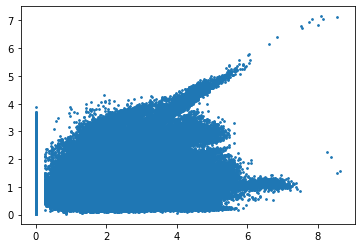

In [35]:
import matplotlib.pyplot as plt
plt.scatter(A_test, re_test_set,s=3)
plt.show()

**Hyperparameter Tuning**

I also tried implementing some hyperparameter tuning. The code below takes several hyperparameter such as k_range, lr_range, epochs_range, beta1_range, beta2_range. Through hyperparameter tuning, it searches for the best combination of the hyperparameter by iterating through all the possible combination and it selects the one with the lowest error.


In [18]:
import itertools

def hyperparameter_tuning(x, k_range, lr_range, epochs_range, betal_range, beta2_range, verbose=True, early_stop_tol=0.00001):
    best_error = np.inf
    best_params = {}
    for params in itertools.product(k_range, lr_range, epochs_range, betal_range, beta2_range):
        k, lr, epochs, betal, beta2 = params
        result = autoencoder(x, k=k, learning_rate=lr, epochs=epochs, betal=betal, beta2=beta2, verbose=verbose, early_stop_tol=early_stop_tol)
        if result['error'][-1] < best_error:
            best_error = result['error'][-1]
            best_params = {'k': k, 'learning_rate': lr, 'epochs': epochs, 'betal': betal, 'beta2': beta2}
    if verbose:
        print("Best hyperparameters:", best_params)
        print("Best error:", best_error)
    return best_params


In [22]:
#k_range = [128, 256, 512, 1024]
#lr_range = [0.0001, 0.001, 0.01]
#epochs_range = [30, 50, 100]
#betal_range = [0.85, 0.9, 0.95]
#beta2_range = [0.99, 0.999, 0.9999]

#best_params = hyperparameter_tuning(train, k_range, lr_range, epochs_range, betal_range, beta2_range)


**Note** I have commented the code as it takes long time to execute

In [20]:
re_test_set_subset = re_test_set[:25, :1000]


In [21]:
np.savetxt('submission.csv', re_test_set_subset, delimiter=',')

After downloading the submission.csv file, I then referred back to R studio to convert the submission file into Kaggle submission format by reshaping them from wide to tall following below code in R.



Convert to Kaggle submission format by reshaping from wide to tall:
```{r}
test <- as.matrix(read.csv("submission.csv", row.names = 1))
```



```{R}
sample_submission <- reshape2::melt(test)
head(sample_submission)
```

```{R}
sample_submission <- data.frame(
  "ID" = paste0("ID_", 1:nrow(sample_submission)), 
  "Expected" = sample_submission$value)
head(sample_submission)
```

Write the final submission file.

```{R}
write.csv(sample_submission, "my_submission.csv", row.names = FALSE)
```

**CONCLUSION:**

The autoencoder model trained had a promising result in reconstructing the test data and by minimizing the mean squared error between the original data and the reconstruction, it shows the model captured essential feature and the pattern of the data.